1.Import relevant libraries

In [1]:
#Question 3a
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

2.Load the dataset 

In [2]:
x=np.array([0,4,8,12,16,20,24,28,32])
y=np.array([394.33,329.50,291.00,255.17,229.33,204.83,179.00,163.83,150.33])

3.Plot the dataset

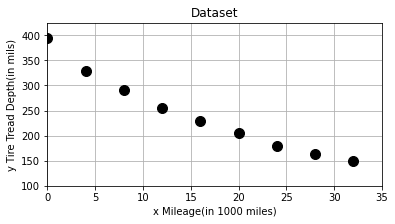

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x, y, 'ok',ms=10)
ax.set_xlim(0, 35)
ax.set_ylim(100, 425)
ax.set_title('Dataset')
plt.xlabel("x Mileage(in 1000 miles)")
plt.ylabel("y Tire Tread Depth(in mils)")
plt.grid()

In [4]:
stdx=np.std(x,ddof=1)
stdy=np.std(y,ddof=1)
avgx=np.mean(x)
avgy=np.mean(y)
s=np.sum((x-avgx)*(y-avgy))
r=s/[(len(x)-1)*stdx*stdy]
k=r*stdy/stdx
b=avgy-k*avgx
print("The expression of the best fit line is y=",k,"x+",b)

The expression of the best fit line is y= [-7.280625] x+ [360.63666667]


5.Plot the Linear Regression Line

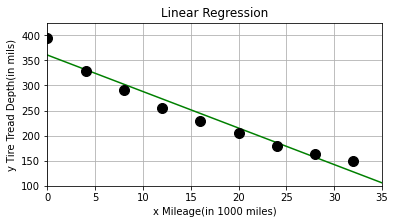

In [5]:
x_tr= np.linspace(0, 40, 200)
yfit=k*x_tr+b

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, yfit, 'g')
ax.plot(x, y, 'ok',ms=10)
ax.set_xlim(0, 35)
ax.set_ylim(100, 425)
ax.set_title('Linear Regression')
plt.xlabel("x Mileage(in 1000 miles)")
plt.ylabel("y Tire Tread Depth(in mils)")
plt.grid()

6.Compute the error performance measured by the sum of squared errors

In [6]:
SSE=round(np.sum((y-k*x-b)**2),2)
print("The error performance measured by the sum of squared errors is",SSE)

The error performance measured by the sum of squared errors is 2531.53


The fitting is generally good for a linear regression fit as can be seen from the plotted diagram.
However,I do think maybe a multiple linear regression  would fit the dataset more precisely as the dataset seems to form a curve rather than a straight line.I suppose it is also due to this reason that the SSE appears to be pretty large.


In [7]:
x_new=np.array([0,4,8,12,16,20,24,28])
y_new=np.array([394.33,329.50,291.00,255.17,229.33,204.83,179.00,163.83])

stdx=np.std(x_new,ddof=1)
stdy=np.std(y_new,ddof=1)
avgx=np.mean(x_new)
avgy=np.mean(y_new)
s=np.sum((x_new-avgx)*(y_new-avgy))
r=s/[(len(x_new)-1)*stdx*stdy]
k_new=r*stdy/stdx
b_new=avgy-k*avgx
print("The expression of the best fit line is y=",k,"x+",b)

The expression of the best fit line is y= [-7.280625] x+ [360.63666667]


8.Plot the figure using the model trained by the new data set

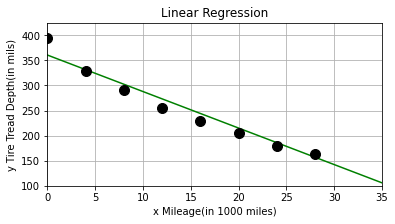

In [8]:
x_tr= np.linspace(0, 40, 200)
yfit=k*x_tr+b

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, yfit, 'g')
ax.plot(x_new, y_new, 'ok',ms=10)
ax.set_xlim(0, 35)
ax.set_ylim(100, 425)
ax.set_title('Linear Regression')
plt.xlabel("x Mileage(in 1000 miles)")
plt.ylabel("y Tire Tread Depth(in mils)")
plt.grid()

9.Test the model using the last sample

Training error performance is 2531.53
Test error performance is 514.08


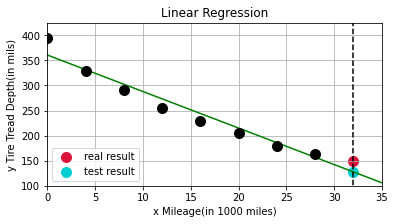

In [9]:
x_test=32
y_test=k*x_test+b
y_real=150.33
SSE_train=round(np.sum((y-k*x-b)**2),2)
SSE_test=round(np.sum((y_real-k*x_test-b)**2),2)
print("Training error performance is",SSE_train)
print("Test error performance is",SSE_test)
signx=np.array([32,32])
signy=np.array([0,450])
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, yfit, 'g')
ax.plot(x_new, y_new, 'ok',ms=10)
ax.plot(signx,signy,'--k')
plt.scatter(x_test,y_real,s=100,c='#DC143C',alpha=1,label='real result')
plt.scatter(x_test,y_test,s=100,c='#00CED1',alpha=1,label='test result')
ax.set_xlim(0, 35)
ax.set_ylim(100, 425)
ax.set_title('Linear Regression')
plt.xlabel("x Mileage(in 1000 miles)")
plt.ylabel("y Tire Tread Depth(in mils)")
plt.legend()
plt.grid()

10.Use the entire dataset to train and use Scikit-learn to compute the expression

In [10]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y)
# Now, we predict points with our trained model.
y_lr = lr.predict(x_tr[:, np.newaxis])

[-7.280625] [360.63666667]


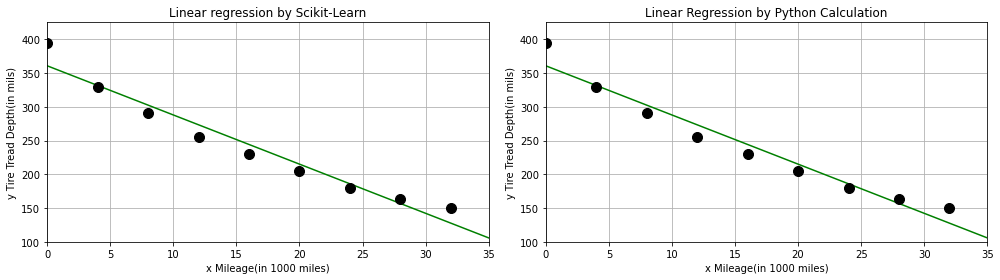

In [11]:
x_tr= np.linspace(0, 40, 200)
yfit=k*x_tr+b
print(k,b)

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(x_tr, y_lr, 'g')
ax1.plot(x, y, 'ok', ms=10)
ax1.set_xlim(0, 35)
ax1.set_ylim(100, 425)
ax1.set_title("Linear regression by Scikit-Learn")
ax1.set_xlabel("x Mileage(in 1000 miles)")
ax1.set_ylabel("y Tire Tread Depth(in mils)")
ax1.grid()

ax2.plot(x_tr, yfit, 'g')
ax2.plot(x, y, 'ok',ms=10)
ax2.set_xlim(0, 35)
ax2.set_ylim(100, 425)
ax2.set_title('Linear Regression by Python Calculation')
ax2.set_xlabel("x Mileage(in 1000 miles)")
ax2.set_ylabel("y Tire Tread Depth(in mils)")
ax2.grid()
fig.set_size_inches(14, 4)
fig.tight_layout()

In [12]:
b=y_lr==yfit
print(y_lr,'\n',yfit)
print(b)#The two ways manifest not exactly the same results here although the plotted lines appear similar.

[360.63666667 359.17322446 357.70978224 356.24634003 354.78289782
 353.31945561 351.8560134  350.39257119 348.92912898 347.46568677
 346.00224456 344.53880235 343.07536013 341.61191792 340.14847571
 338.6850335  337.22159129 335.75814908 334.29470687 332.83126466
 331.36782245 329.90438023 328.44093802 326.97749581 325.5140536
 324.05061139 322.58716918 321.12372697 319.66028476 318.19684255
 316.73340034 315.26995812 313.80651591 312.3430737  310.87963149
 309.41618928 307.95274707 306.48930486 305.02586265 303.56242044
 302.09897822 300.63553601 299.1720938  297.70865159 296.24520938
 294.78176717 293.31832496 291.85488275 290.39144054 288.92799832
 287.46455611 286.0011139  284.53767169 283.07422948 281.61078727
 280.14734506 278.68390285 277.22046064 275.75701843 274.29357621
 272.830134   271.36669179 269.90324958 268.43980737 266.97636516
 265.51292295 264.04948074 262.58603853 261.12259631 259.6591541
 258.19571189 256.73226968 255.26882747 253.80538526 252.34194305
 250.8785008